In [1]:
from fastai.vision.all import *
from fastai.distributed import *
from fastai.metrics import error_rate
from fastai.callback.tracker import SaveModelCallback

In [2]:
if torch.cuda.is_available():
    print("CUDA Available")
    print(torch.cuda.device_count())
else:
    print("No CUDA")

CUDA Available
4


In [3]:
from models.backbone import Backbone
from models.encoder import EncoderModule
from models.utils.joiner2 import *
from models.utils.losses import *
from models.utils.metrics import Accuracy
from models.unet import UNet

In [4]:
H = 320
W= 320
bs = 5

seed = 1234

In [5]:
model = Joiner(num_encoder_layers = 5, nhead=4, backbone = True, num_classes = 10, bypass=False, mask=None, pos_enc = "sin", batch_size=bs, hidden_dim=256, image_h=H, image_w=W, grid_l=4, penalty_factor="1", alpha=1)

In [6]:
path = untar_data(URLs.IMAGENETTE_320)

transform = ([*aug_transforms(),Normalize.from_stats([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(H,W),
                 batch_tfms=transform)

dld = data.dataloaders(path/'train',bs=bs) 

In [7]:
#dld.train_ds[0]

In [8]:
#data.show_batch()

In [9]:
save = SaveModelCallback(monitor='Accuracy', fname='Encoder')


In [10]:
model_path = Path.home()/'Luiz/saved_models'
learn = Learner(dld, model, loss_func=CriticLossWrapper(2), metrics=[Accuracy], cbs=[save], model_dir=model_path)

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=0.0008317637839354575)

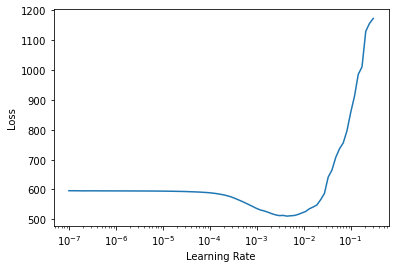

In [11]:
learn.lr_find()

In [16]:
learn.fit_flat_cos(3,1e-6)

epoch,train_loss,valid_loss,acc_cifar,time
0,1.844190,1.729315,0.381100,07:19
1,1.717086,1.607476,0.427800,07:21
2,1.623421,1.548888,0.453300,07:20


In [11]:
learn.export(model_path/"Untrained_model.pkl")